# **Import Libraries**

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report

# **Load and Preprocess the Dataset**

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
--- Dataset Shapes ---
x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


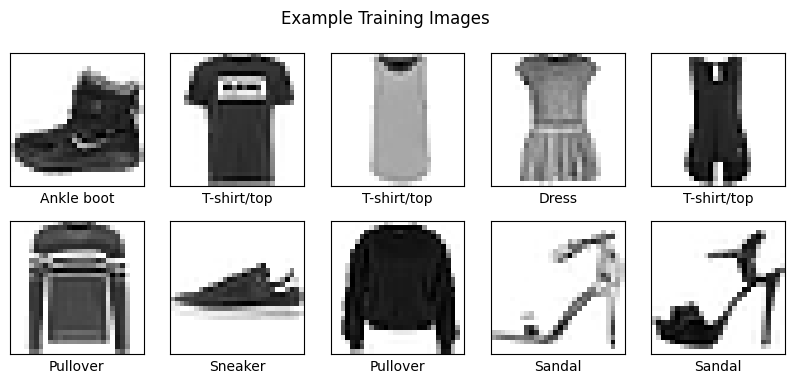

In [2]:
# 1. Load the dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# 2. Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 3. Print dataset shapes
print("--- Dataset Shapes ---")
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

# 4. Normalize the pixel values (Requirement 5)
x_train = x_train / 255.0
x_test = x_test / 255.0

# 5. Visualize a few images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.suptitle("Example Training Images")
plt.show()

# **Build the Model**

In [ ]:
# Build the model architecture 
model = keras.Sequential([
    # Input layer: Flatten the 28x28 image to 784 features
    layers.Flatten(input_shape=(28, 28)),

    # Hidden Layer 1: 256 neurons, ReLU activation
    layers.Dense(256, activation='relu'),

    # Hidden Layer 2: 128 neurons, ReLU activation
    layers.Dense(128, activation='relu'),

    # Output Layer: 10 neurons (one for each class), softmax activation
    layers.Dense(10, activation='softmax')
])

# Display the model's architecture
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

# **Compile the Model**

In [ ]:
# Compile the model (Requirement 4)
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=SparseCategoricalCrossentropy(), 
    metrics=['accuracy']
)

# **Train the Model**

In [7]:
# Training setup
BATCH_SIZE = 64
EPOCHS = 4

# Train the model
history = model.fit(
    x_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_test, y_test)
)

Epoch 1/4
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9516 - loss: 0.1269 - val_accuracy: 0.8902 - val_loss: 0.4220
Epoch 2/4
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9541 - loss: 0.1194 - val_accuracy: 0.8969 - val_loss: 0.3950
Epoch 3/4
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9548 - loss: 0.1167 - val_accuracy: 0.8951 - val_loss: 0.3973
Epoch 4/4
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9578 - loss: 0.1106 - val_accuracy: 0.8915 - val_loss: 0.4154


# **Evaluate Model and Visualize Training**

313/313 - 1s - 4ms/step - accuracy: 0.8915 - loss: 0.4154

--- Final Model Performance ---
Final Training Accuracy: 95.59%
Final Test Accuracy:     89.15%

Success: Test accuracy is higher than 85%!


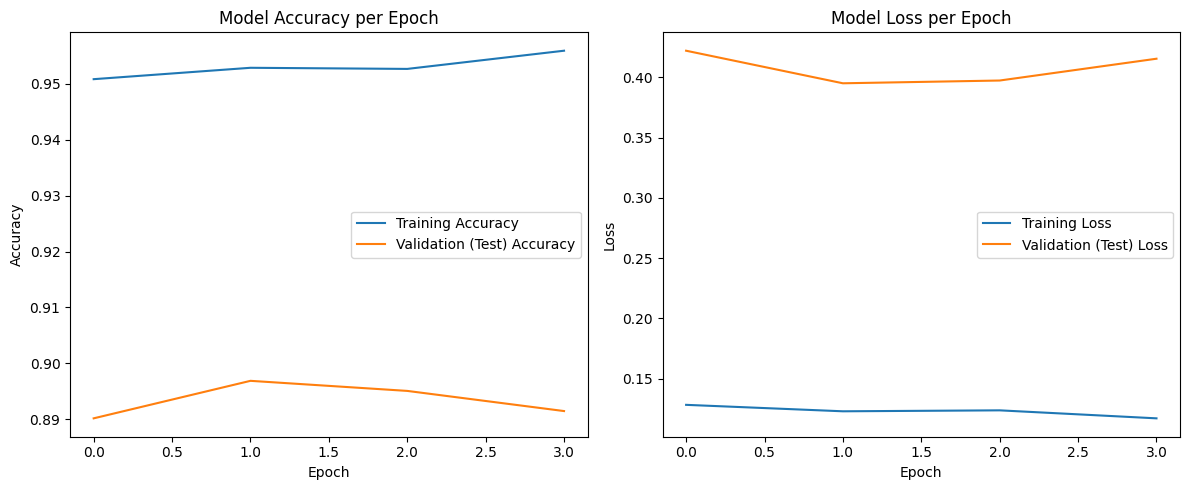

In [10]:
# 1. Evaluate final performance on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

# 2. Report final training and test accuracy
train_acc = history.history['accuracy'][-1]
print("\n--- Final Model Performance ---")
print(f"Final Training Accuracy: {train_acc * 100:.2f}%")
print(f"Final Test Accuracy:     {test_acc * 100:.2f}%")

# Check if goal is met
if test_acc > 0.85:
    print("\nSuccess: Test accuracy is higher than 85%!")
else:
    print("\nNote: Test accuracy did not exceed 85%.")

# 3. Visualize loss and accuracy per epoch
history_df = pd.DataFrame(history.history)

plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation (Test) Accuracy')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation (Test) Loss')
plt.title('Model Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# **Analysis and Predictions**

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


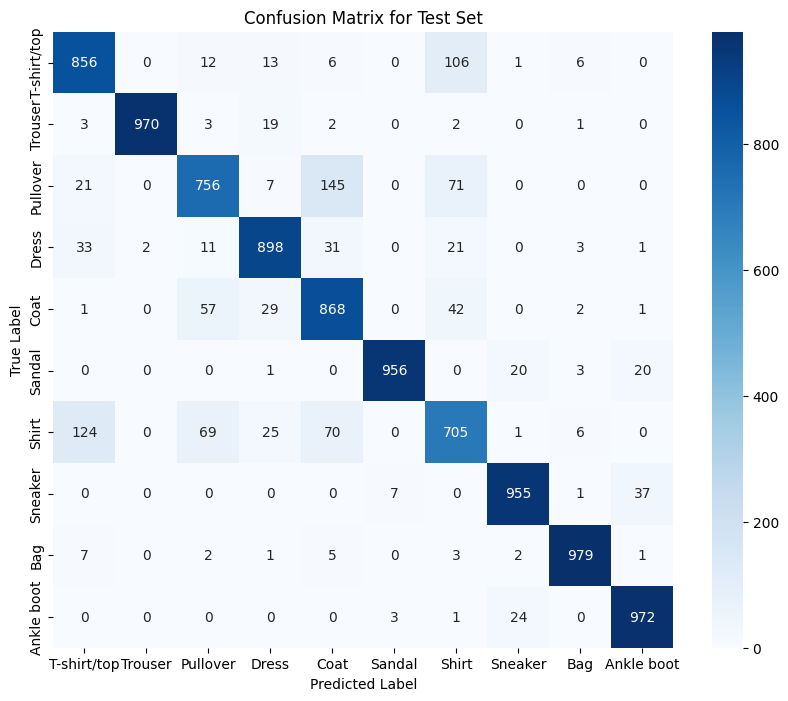


--- Classification Report ---
              precision    recall  f1-score   support

 T-shirt/top       0.82      0.86      0.84      1000
     Trouser       1.00      0.97      0.98      1000
    Pullover       0.83      0.76      0.79      1000
       Dress       0.90      0.90      0.90      1000
        Coat       0.77      0.87      0.82      1000
      Sandal       0.99      0.96      0.97      1000
       Shirt       0.74      0.70      0.72      1000
     Sneaker       0.95      0.95      0.95      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.94      0.97      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
# 1. Get model predictions for the test set
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# 2. Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 3. Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for Test Set')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 4. (Optional) Print classification report for more detail
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=class_names))

--- Example Predictions (Correct: Blue, Incorrect: Red) ---
Displaying 10 Correct Predictions:

Displaying 5 Incorrect Predictions:


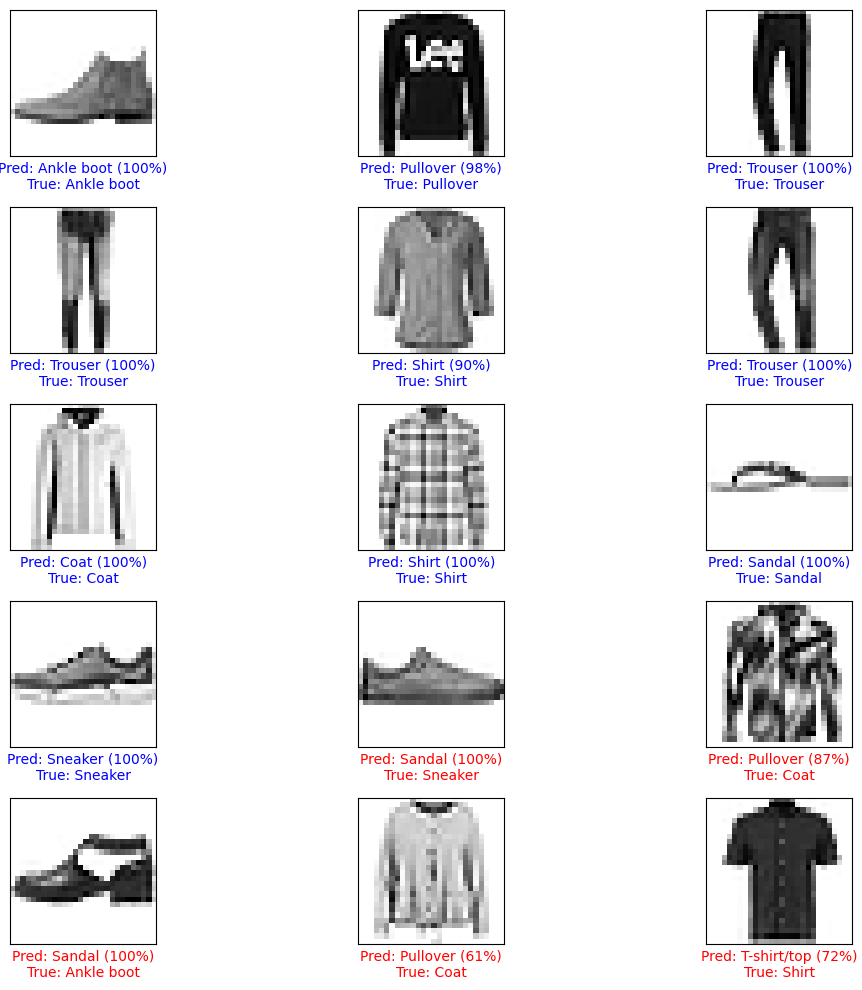

In [12]:
# Helper function to plot image, prediction, and true label
def plot_prediction(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)

    # Color the title red if incorrect, blue if correct
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"Pred: {class_names[predicted_label]} ({100*np.max(predictions_array):.0f}%)\nTrue: {class_names[true_label]}",
               color=color)

# Plot a few correct and incorrect predictions
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

print("--- Example Predictions (Correct: Blue, Incorrect: Red) ---")

# Find some correct and incorrect examples to show
correct_indices = np.where(y_pred == y_test)[0]
incorrect_indices = np.where(y_pred != y_test)[0]

# Show some correct examples
print(f"Displaying 10 Correct Predictions:")
for i, index in enumerate(correct_indices[:10]):
    plt.subplot(num_rows, num_cols, i + 1)
    plot_prediction(index, y_pred_probs[index], y_test, x_test)

# Show some incorrect examples
print(f"\nDisplaying 5 Incorrect Predictions:")
for i, index in enumerate(incorrect_indices[:5]):
    plt.subplot(num_rows, num_cols, 10 + i + 1)
    plot_prediction(index, y_pred_probs[index], y_test, x_test)

plt.tight_layout()
plt.show()